# **Data Preprocessing**

In [86]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [87]:
df = pd.read_csv('spam.tsv', sep='\t')

In [88]:
df.head()

,label,message,length,punct
0,ham,"Go until jurong point, crazy.. Available only ...",111,9
1,ham,Ok lar... Joking wif u oni...,29,6
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,155,6
3,ham,U dun say so early hor... U c already then say...,49,6
4,ham,"Nah I don't think he goes to usf, he lives aro...",61,2


In [89]:
df.describe()

,length,punct
count,5572.000000,5572.000000
mean,80.489950,4.177495
std,59.942907,4.623919
min,2.000000,0.000000
25%,36.000000,2.000000
50%,62.000000,3.000000
75%,122.000000,6.000000
max,910.000000,133.000000


In [90]:
df['label'].value_counts()

label
ham     4825
spam     747
Name: count, dtype: int64

In [91]:
(df['label'].value_counts()/len(df))*100
#so this data set is not labeled 

label
ham     86.593683
spam    13.406317
Name: count, dtype: float64

In [92]:
df[df['label'] =='ham']

,label,message,length,punct
0,ham,"Go until jurong point, crazy.. Available only ...",111,9
1,ham,Ok lar... Joking wif u oni...,29,6
3,ham,U dun say so early hor... U c already then say...,49,6
4,ham,"Nah I don't think he goes to usf, he lives aro...",61,2
6,ham,Even my brother is not like to speak with me. ...,77,2
...,...,...,...,...
5565,ham,Huh y lei...,12,3
5568,ham,Will ü b going to esplanade fr home?,36,1
5569,ham,"Pity, * was in mood for that. So...any other s...",57,7
5570,ham,The guy did some bitching but I acted like i'd...,125,1


In [93]:
ham=df[df['label'] =='ham']

In [94]:
spam=df[df['label'] =='spam']

In [95]:
ham.shape,spam.shape

((4825, 4), (747, 4))

In [96]:
ham=ham.sample(spam.shape[0])

In [97]:
ham.shape,spam.shape

((747, 4), (747, 4))

In [98]:
print(type(ham))
print(type(spam))

<class 'pandas.core.frame.DataFrame'>
<class 'pandas.core.frame.DataFrame'>


In [99]:
data=pd.concat([ham, spam], ignore_index=True)

In [100]:
data.shape

(1494, 4)

In [101]:
data['label'].value_counts()

label
ham     747
spam    747
Name: count, dtype: int64

In [102]:
data.head()

,label,message,length,punct
0,ham,S'fine. Anytime. All the best with it.,38,4
1,ham,ARE YOU IN TOWN? THIS IS V. IMPORTANT,37,2
2,ham,"Short But Cute: ""Be a good person, but dont tr...",76,11
3,ham,Sac needs to carry on:),23,2
4,ham,"Oh, my love, it's soooo good to hear from you....",154,6


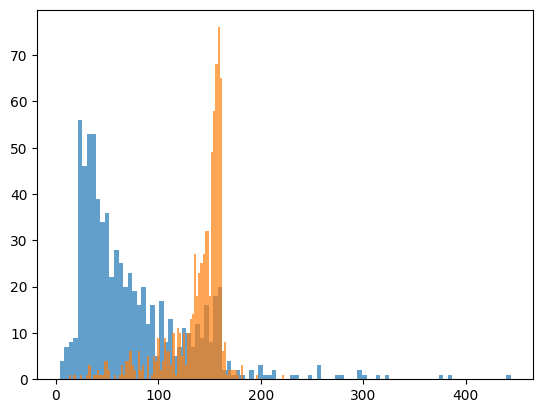

In [103]:
plt.hist(data[data['label'] == 'ham']['length'], bins = 100, alpha = 0.7)
plt.hist(data[data['label'] == 'spam']['length'], bins = 100, alpha = 0.7)
plt.show()

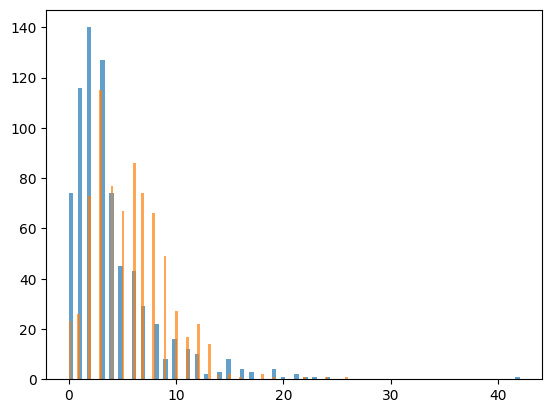

In [104]:
plt.hist(data[data['label'] == 'ham']['punct'], bins = 100, alpha = 0.7)
plt.hist(data[data['label'] == 'spam']['punct'], bins = 100, alpha = 0.7)
plt.show()

# **Building the Model (Random Forest)**